In [2]:
pip install ChernoffFace

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
from ChernoffFace import chernoff_face

df = pd.read_csv(r"C:\Users\Dongchan Kim\pyproject\Dataset\Cars93.csv")
df.head()

c:\Users\Dongchan Kim\AppData\Local\Programs\Python\Python313\Lib\site-packages\ChernoffFace\DataLoaders.py:2: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


,Unnamed: 0,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,NaN,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x

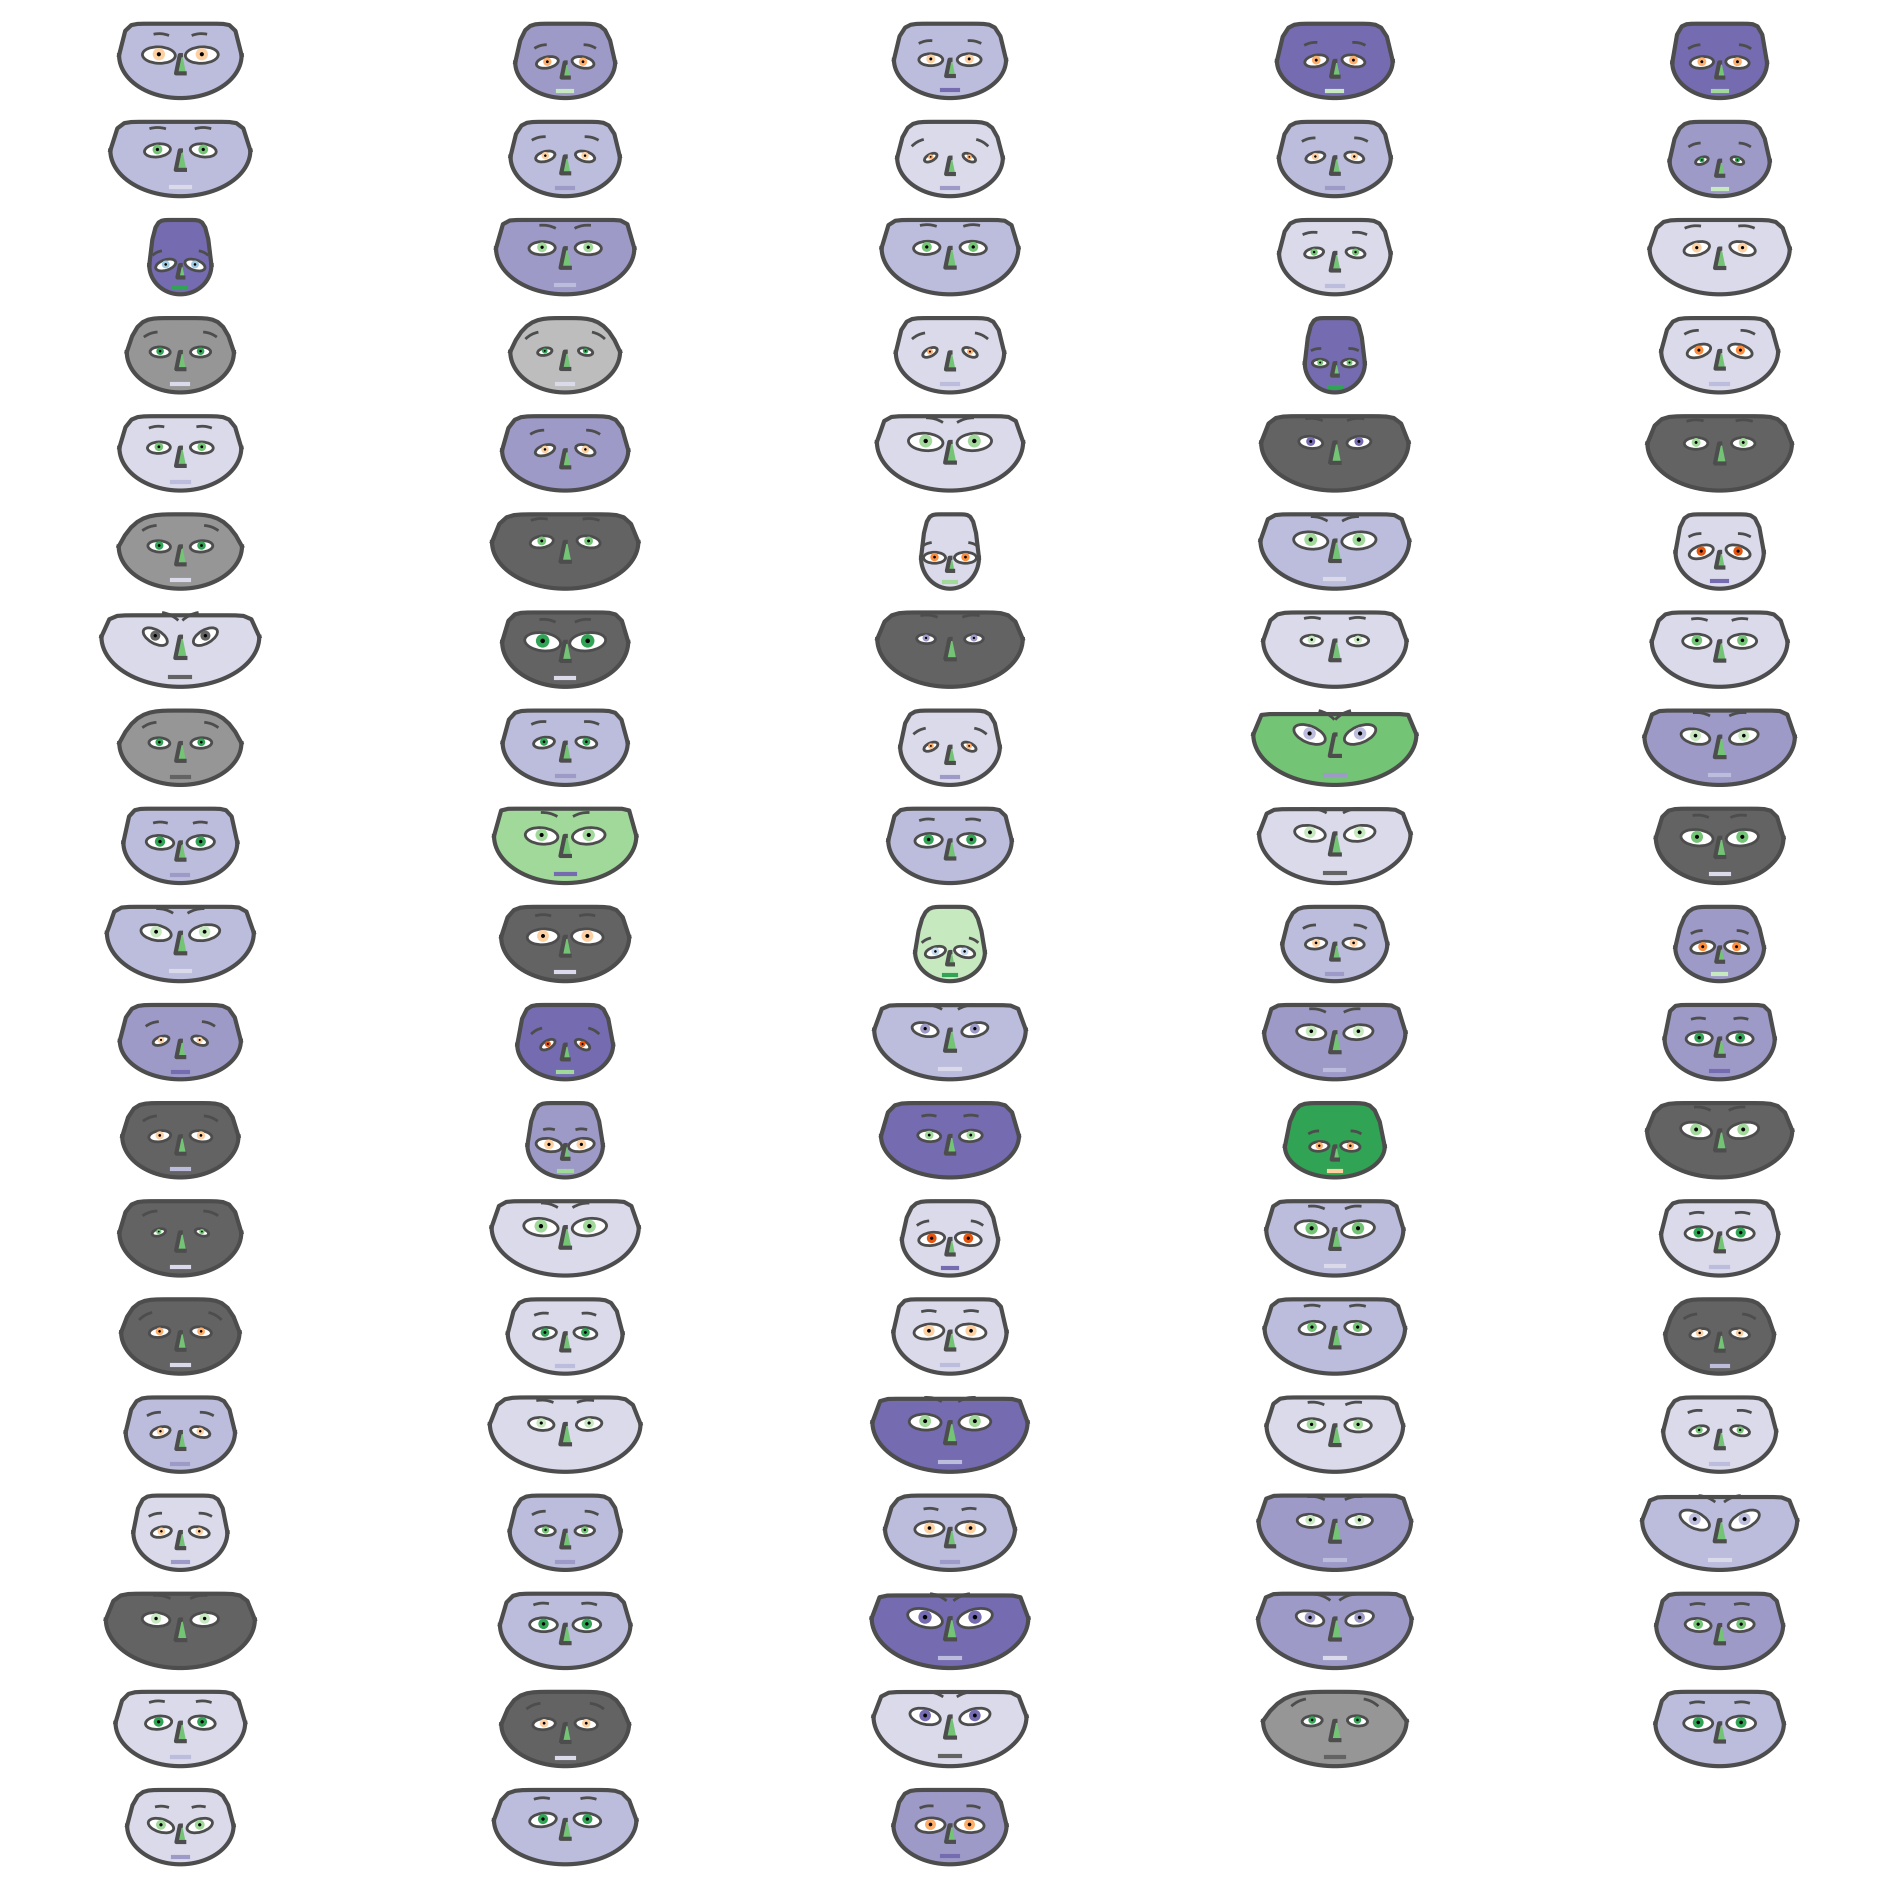

In [38]:
import pandas as pd
from ChernoffFace import chernoff_face
import numpy as np

features = ['Price', 'MPG.highway', 'Horsepower', 'RPM', 'Length', 'Weight']
data = df[features].dropna()
data_norm = variables_rescale(data)

# 1개의 얼굴 그리기 (2차원 배열로 넘김)
#chernoff_face(data_norm.iloc[0].values.reshape(1, -1))

# 여러 개 얼굴 그리기
fig = chernoff_face(data=data_norm,
                    n_columns=5,
                    long_face=False,
                    color_mapper=matplotlib.cm.tab20c_r,
                    figsize=(12, 12), dpi=200)

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


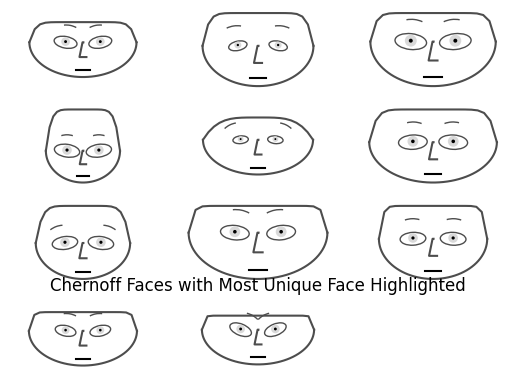

In [39]:
import pandas as pd
import numpy as np
from ChernoffFace import chernoff_face
import matplotlib.pyplot as plt

# Cars93 데이터프레임(df) 가정
features = ['Price', 'MPG.highway', 'Horsepower', 'RPM', 'Length', 'Weight']
data = df[features].dropna()

# 정규화 (0~1 스케일)
data_norm = (data - data.min()) / (data.max() - data.min())

# 평균 계산
mean_face = data_norm.mean()

# 각 행과 평균 거리 계산 (유클리드)
distances = np.linalg.norm(data_norm - mean_face, axis=1)

# 가장 독특한 얼굴 인덱스
most_unique_idx = distances.argmax()

# 일반 얼굴 10개 샘플링
sample_faces = data_norm.sample(10, random_state=1)

# 가장 독특한 얼굴 데이터(1xN) 추가 병합
cher_faces = pd.concat([sample_faces, data_norm.loc[[most_unique_idx]]])

# 체르노프 얼굴 시각화
fig = chernoff_face(cher_faces.values)

# 타이틀 추가 (matplotlib 필요)
plt.title("Chernoff Faces with Most Unique Face Highlighted")
plt.show()


In [5]:
from ChernoffFace import *
import numpy
import matplotlib.cm

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x

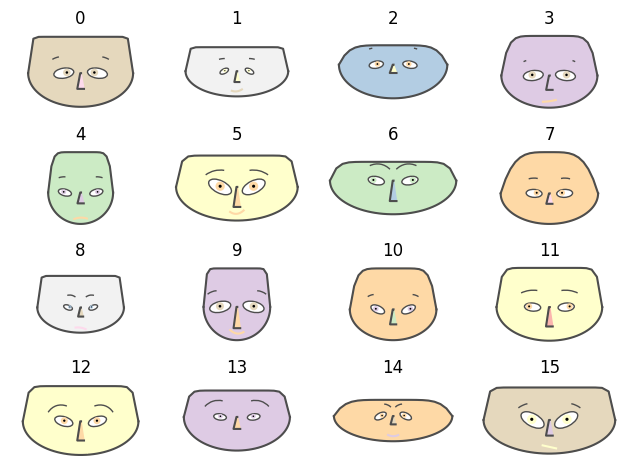

In [11]:
# Generate data
numpy.random.seed()
data = numpy.random.rand(16, 12)

# Make Chernoff faces
fig = chernoff_face(data=data, 
                    titles=[str(x) for x in list(range(len(data)))], 
                    color_mapper=matplotlib.cm.Pastel1)

# Display
fig.tight_layout()
matplotlib.pyplot.show()

In [12]:
dfData=load_employee_attitude_data_frame()
dfData.head()

,Rating,Complaints,Privileges,Learning,Raises,Critical,Advancement
0,43,51,30,39,61,92,45
1,63,64,51,54,63,73,47
2,71,70,68,69,76,86,48
3,61,63,45,47,54,84,35
4,81,78,56,66,71,83,47


In [13]:
dfData2 = variables_rescale(dfData)
dfData2.head()

,Rating,Complaints,Privileges,Learning,Raises,Critical,Advancement
0,0.066667,0.264151,0.000000,0.121951,0.400000,1.000000,0.425532
1,0.511111,0.509434,0.396226,0.487805,0.444444,0.558140,0.468085
2,0.688889,0.622642,0.716981,0.853659,0.733333,0.860465,0.489362
3,0.466667,0.490566,0.283019,0.317073,0.244444,0.813953,0.212766
4,0.911111,0.773585,0.490566,0.780488,0.622222,0.790698,0.468085


Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


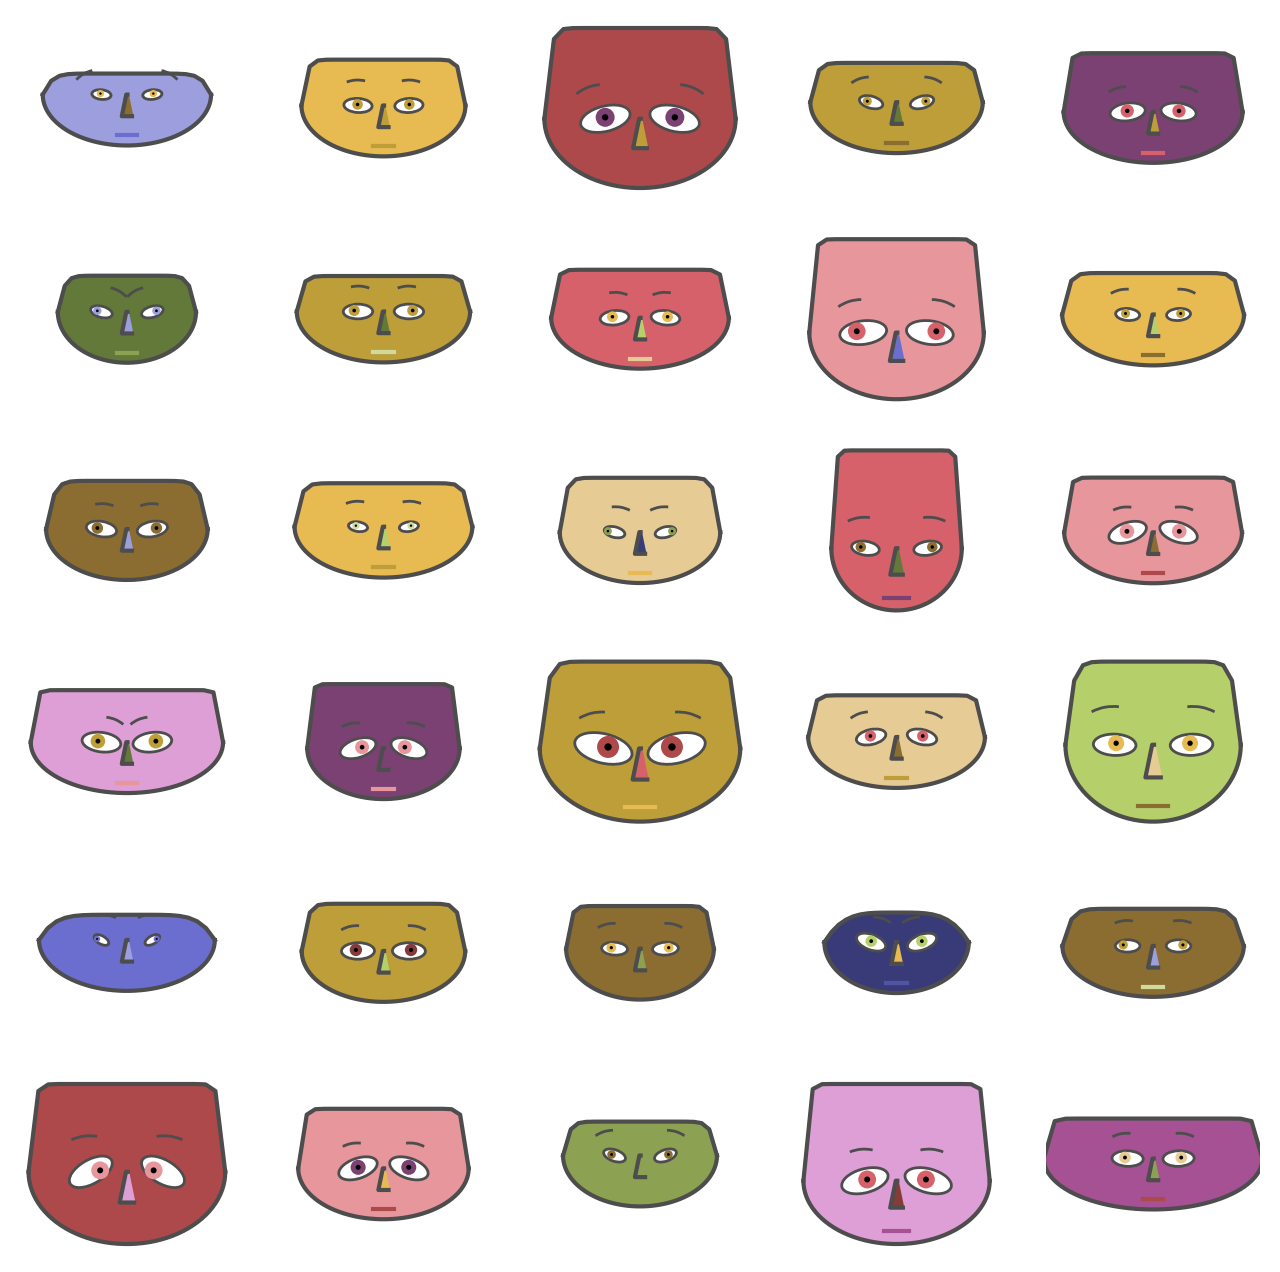

In [14]:
fig = chernoff_face(data=dfData2,
                    n_columns=5,
                    long_face=False,
                    color_mapper=matplotlib.cm.tab20b,
                    figsize=(8, 8), dpi=200)

In [15]:
dfData=load_usa_arrests_data_frame()
dfData.head()


,StateName,Murder,Assault,UrbanPopulation,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [16]:
dfData2 = variables_rescale(dfData)
dfData2.head()

,StateName,Murder,Assault,UrbanPopulation,Rape
0,Alabama,0.746988,0.654110,0.440678,0.359173
1,Alaska,0.554217,0.746575,0.271186,0.961240
2,Arizona,0.439759,0.852740,0.813559,0.612403
3,Arkansas,0.481928,0.496575,0.305085,0.315245
4,California,0.493976,0.791096,1.000000,0.860465


Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x

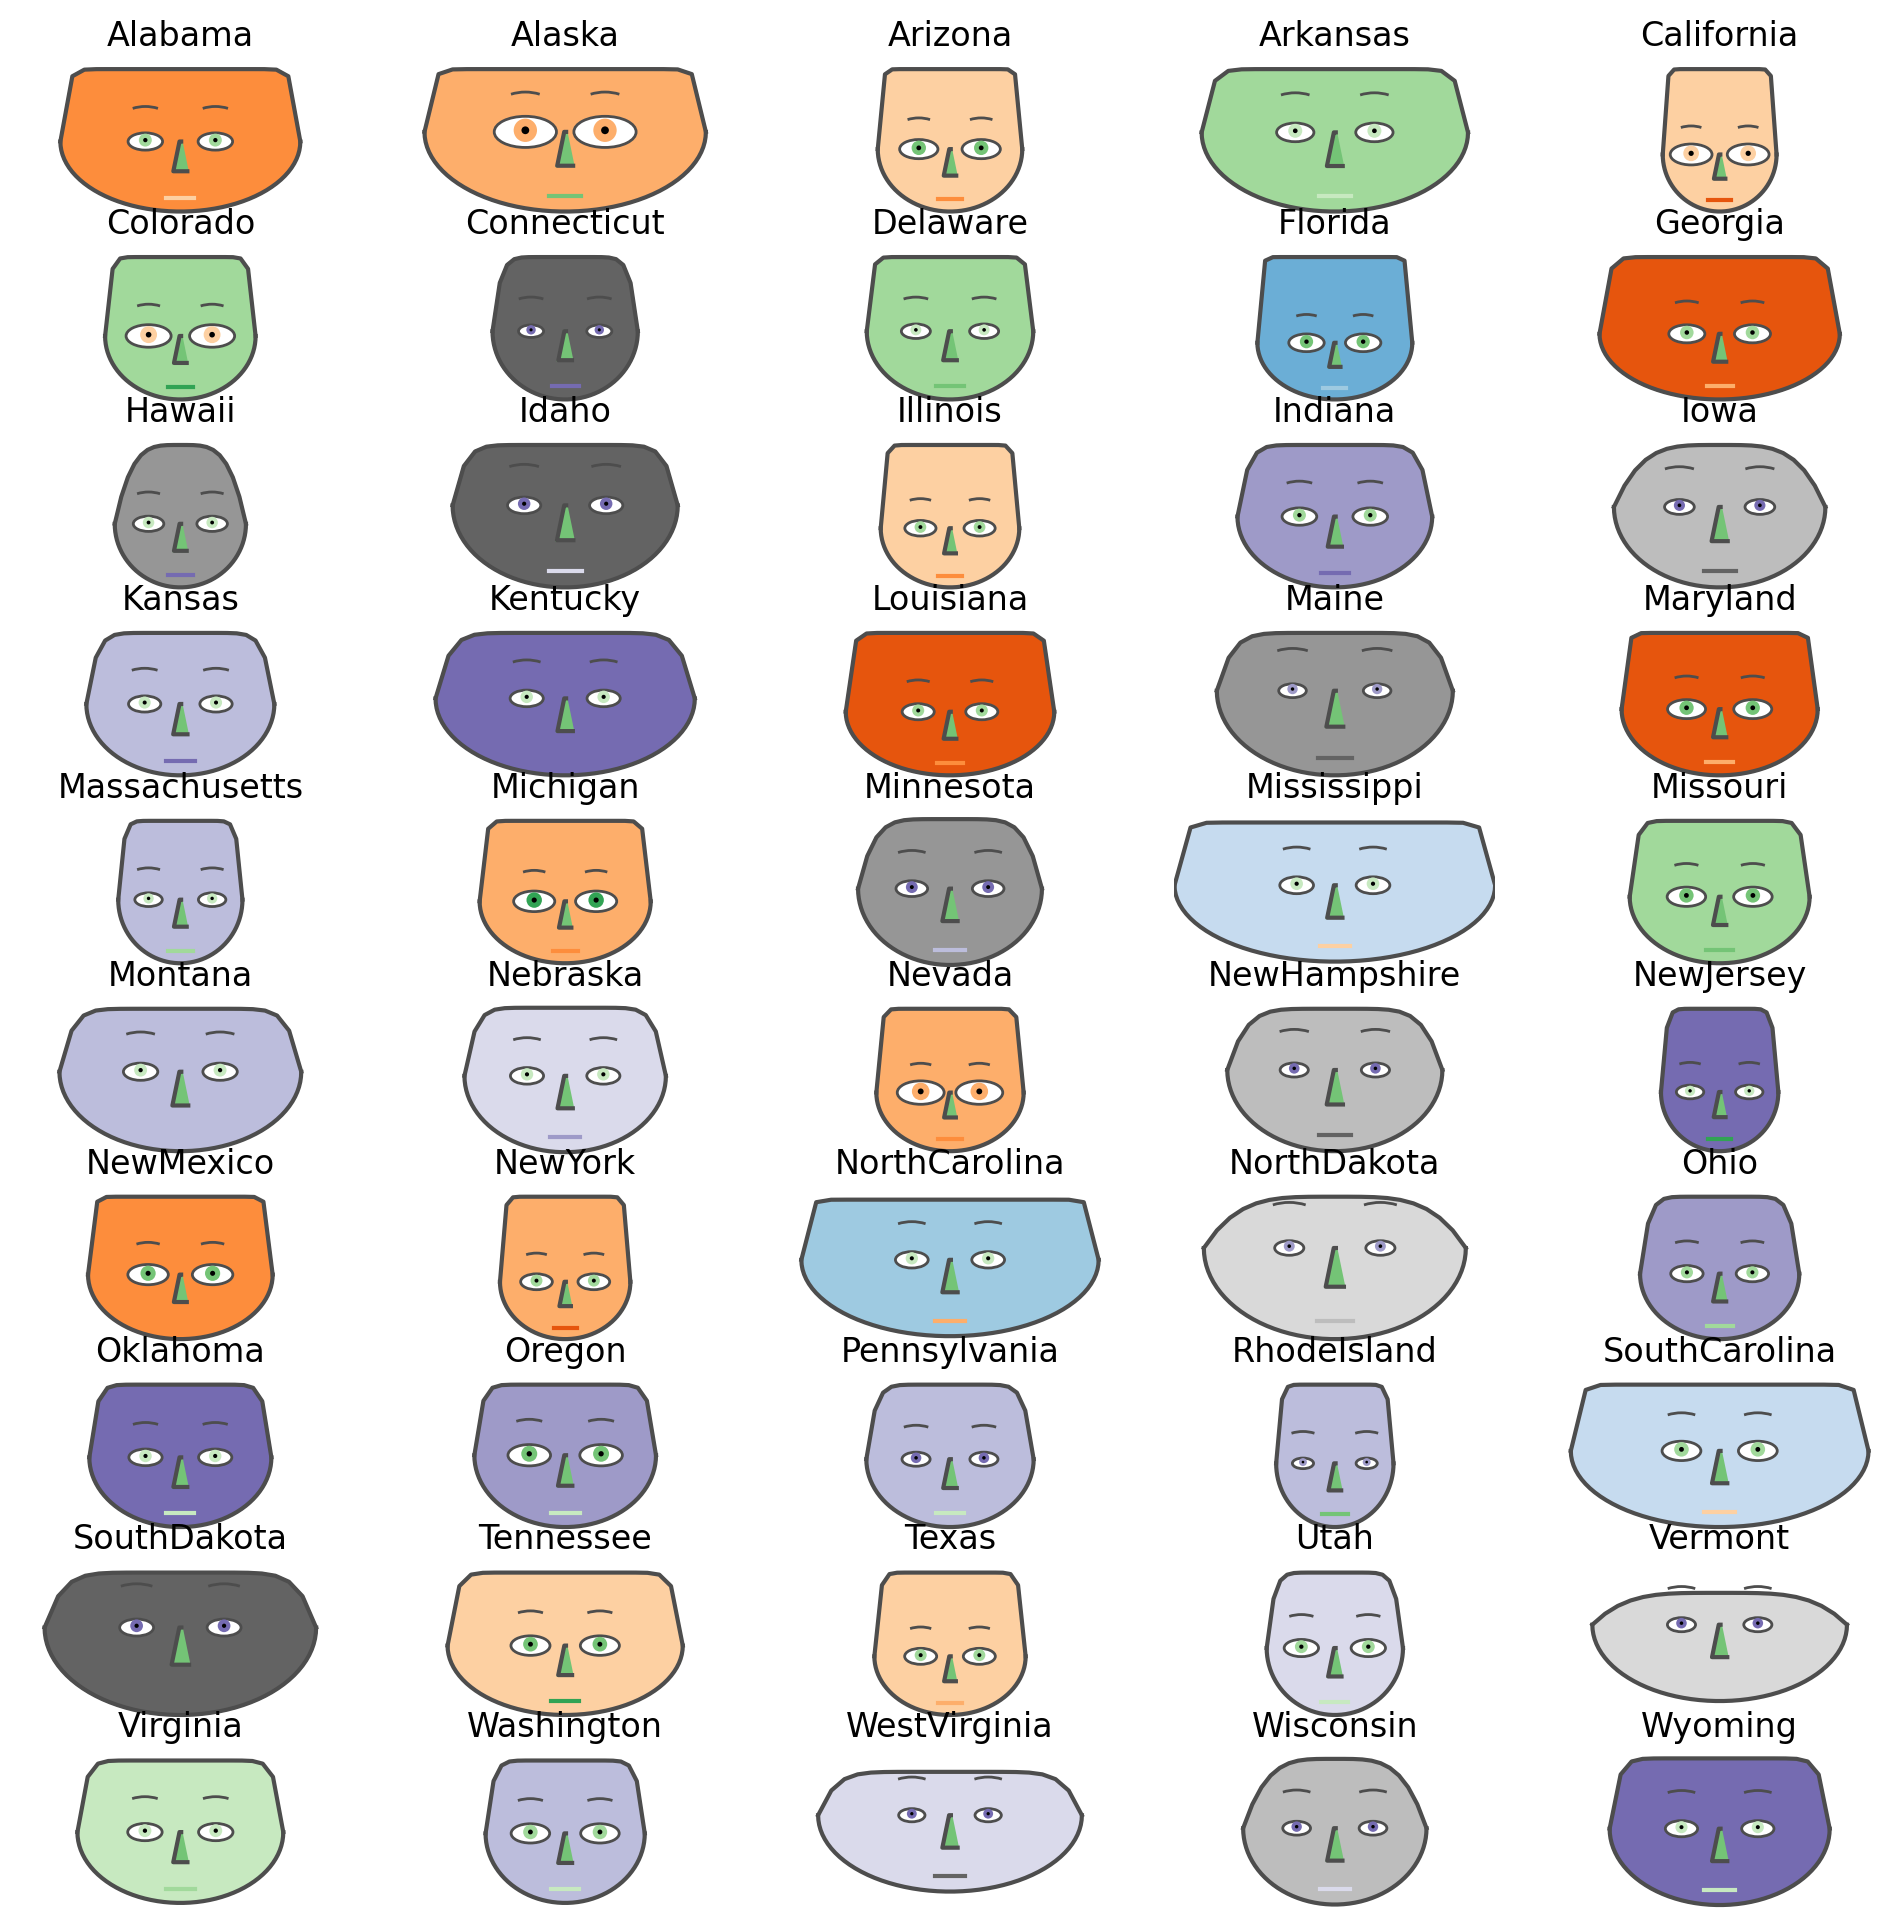

In [20]:
fig = chernoff_face(data=dfData2,
                    n_columns=5,
                    long_face=False,
                    color_mapper=matplotlib.cm.tab20c_r,
                    figsize=(12, 12), dpi=200)